In [42]:
import math
from random import randint
import random
import matplotlib.pyplot as plt
import numpy as np

#Objective Function number 1
def calculate_PCSI(V_Car, V_Obstcale, D, theta):

    PCSI_Delta_V = (V_Car - V_Obstcale) / D  #V is the velocity and D is the distance between the 2 vechiles or the vechile and the obstcale

    #theta is the angle between the 2 vechiles
    if 0 <= theta <= 15 or 165 <= theta <= 180:
        PCSI_theta = 1
    elif 15 <= theta <= 45 or 135 <= theta <= 165:
        PCSI_theta = 3
    elif 45 <= theta <= 90 or 90 <= theta <= 135:
        PCSI_theta = 2
    else:
        PCSI_theta = 0

    PCSI_mass_ratio = 1 #the mass ratio between the 2 vechiles or the vechile and the obstcale

    total_PCSI = (1/3) * PCSI_Delta_V + (1/3) * PCSI_theta + (1/3) * PCSI_mass_ratio

    return total_PCSI


#Objective Function number 2
def calculate_CSI(length, width):

  e = 0.5 #the coefficient of restitution
  m1 = 1000 #the mass of the vechile
  m2 = 1000 #the mass of the obstcale
  Rk = 1 #the stiffness ratio
  Rm = 1 #the mass ratio
  p1 = 100
  p2 = math.sqrt((m2 * (((3.8 **2) / 12) + ((1.5 ** 2 ) / 12))) / m2)
  h2 = 0.25 * 3.8 #Force Arm for the obstcale
  h1 = 0.25 * length #Force Arm for the vechile
  p1 = math.sqrt((m1 * (((length **2) / 12) + ((width ** 2 ) / 12))) / m1) #the radius of gyration for the vechile

  Y1 = (p1**2) / ((p1**2) + (h1**2)) #the radius of gyration for the vechile
  Y2 = (p2**2) / ((p2**2) + (h2**2)) #the radius of gyration for the obstcale



  total_CSI = math.sqrt(( Y1 * Y2 * (1- (e**2) ) ) / ((1 + Rk)  * (Y2 + (Y1 * Rm))))

  return total_CSI




# V_Car = 70
# V_Obstcale = 40
# theta = 30
# D = 2

# PCSI_result = calculate_PCSI(V_Car, V_Obstcale ,D, theta)
# print(f"The Potential Crash Severity Index (PCSI) is: {PCSI_result}")

# e = 0.8
# Rk = 0.9
# Rm = 0.95
# h = 0.25

#CSI_result = calculate_CSI()
#print(f"The Crash Severity Index (CSI) is: {CSI_result}")

The best F is 1.0953147402831873
The best V is 64.29721104247811
The best theta is 171.54754790851422


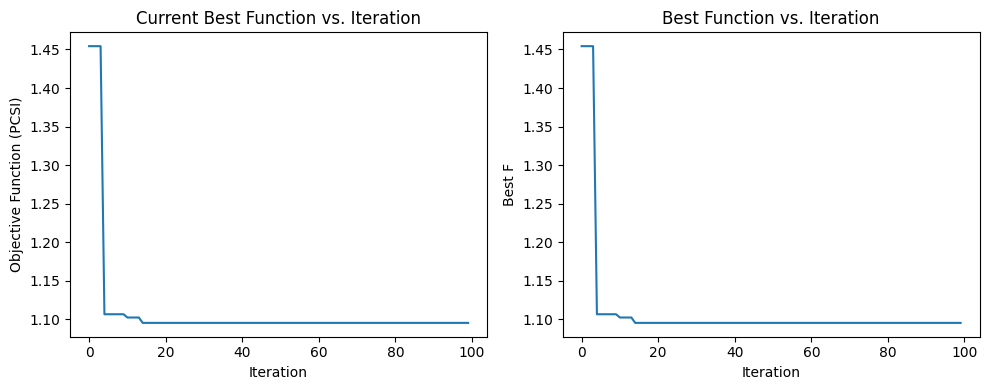

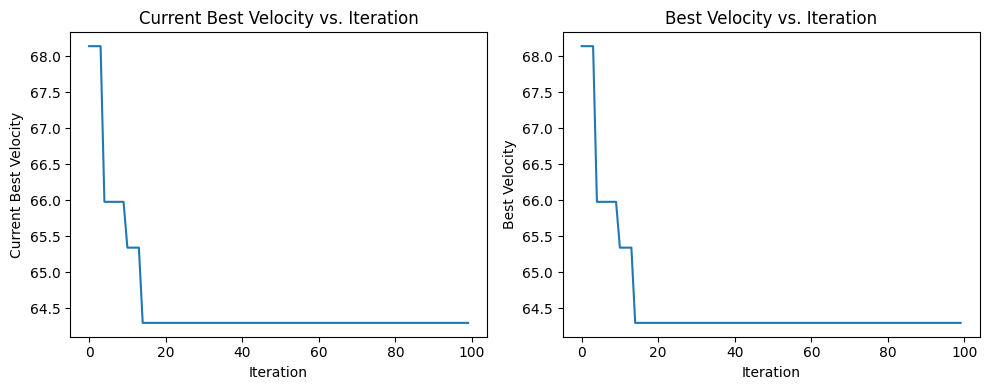

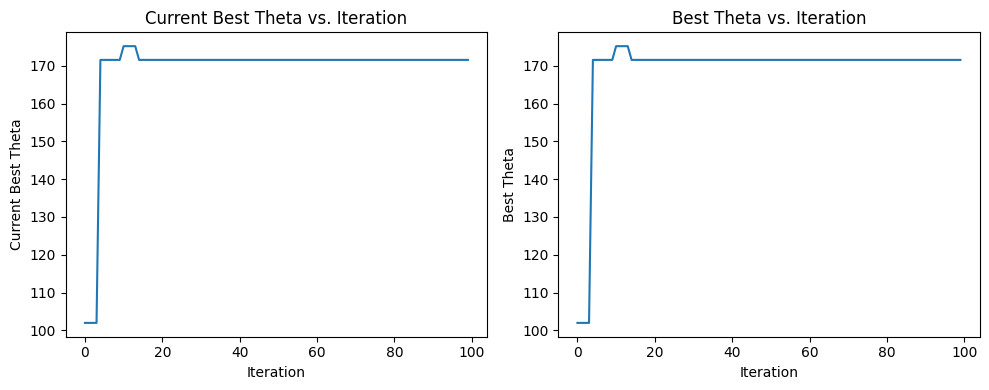

In [64]:
import random

#arrays to store the values
f_best_values = []
f_curr_values = []
v_best_values = []
v_curr_values = []
theta_best_values = []
theta_curr_values = []

#GA Function 1 for PCSI
def GA1(V_Car, V_Obstcale, D, theta):

    Time_to_Impact = D / (V_Car - V_Obstcale)
    V_Car_Min = (-8 * Time_to_Impact) + V_Car  #minimum vlaue of the Velocity
    V_Reduction_Max = V_Car - V_Car_Min

    #boundiries of the theta
    Theta_max = theta + 40
    Theta_min = theta - 40

    i_max = 100 #num of generations
    i = 0
    m = 5 #num of chromosomes
    f_curr = []

    #Initilization of feasible solution
    Gen_old = [
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)],
        [random.uniform(V_Car_Min, V_Car), random.uniform(Theta_min, Theta_max)]
    ]

    #Sorting the Solution based of the value of PCSI function
    sorted_gen_curr = sorted(Gen_old, key=lambda x: calculate_PCSI(x[0], V_Obstcale, D, x[1]))

    #Getting the best decision varibles and function
    f_best = calculate_PCSI(sorted_gen_curr[0][0],V_Obstcale, D, sorted_gen_curr[0][1])
    x_best = sorted_gen_curr[0]



    while (i < i_max):

      # Elitisim
      Gen_new = [sorted_gen_curr[0], [0,0], [0,0], [0,0], [0,0]]

      #Random resiting Mutation
      r = round(random.random()) #random number

      Mutated_arr = [0,0]
      if (r == 0):
        Mutated_arr = [random.uniform(V_Car_Min, V_Car), sorted_gen_curr[4][1]]
      else :
        Mutated_arr = [sorted_gen_curr[4][0], random.uniform(Theta_min, Theta_max)]

      Gen_new[1] = Mutated_arr

      #Uniform Cross Over
      #parent selection according to rank
      #Cross Over between best elite and 2nd best elite
      r1 = round(random.random()) #random number1
      r2 = round(random.random()) #random number2

      child1 = [0,0] #first child
      child2 = [0,0] #second child

      if (r1 == 1):
        child1[0] = sorted_gen_curr[1][0]
        child2[0] = sorted_gen_curr[0][0]
      else:
        child1[0] = sorted_gen_curr[0][0]
        child2[0] = sorted_gen_curr[1][0]

      if (r2 == 1):
         child1[1] = sorted_gen_curr[1][1]
         child2[1] = sorted_gen_curr[0][1]
      else:
         child1[1] = sorted_gen_curr[0][1]
         child2[1] = sorted_gen_curr[1][1]


      r3 = round(random.random())
      r4 = round(random.random())

      child3 = [0,0] #third child

      if (r3 == 1):
        child3[0] = sorted_gen_curr[2][0]
      else:
        child3[0] = sorted_gen_curr[0][0]

      if (r4 == 1):
         child3[1] = sorted_gen_curr[2][1]
      else:
         child3[1] = sorted_gen_curr[0][1]


      Gen_new[2] = child1
      Gen_new[3] = child2
      Gen_new[4] = child3

      sorted_gen_curr = sorted(Gen_new, key=lambda x: calculate_PCSI(x[0], V_Obstcale, D, x[1]))

      f_curr = calculate_PCSI(sorted_gen_curr[0][0],V_Obstcale, D, sorted_gen_curr[0][1])
      x_best_curr = sorted_gen_curr[0]

      if (f_curr < f_best):
        f_best = f_curr
        x_best = x_best_curr

      i += 1

      #for the plotting
      f_best_values.append(f_best)
      v_best_values.append(x_best[0])
      theta_best_values.append(x_best[1])
      f_curr_values.append(f_curr)
      v_curr_values.append(x_best_curr[0])
      theta_curr_values.append(x_best_curr[1])



    return f_best, x_best




GA1_Result = GA1(70, 0, 50, 140)
#print(SA_Result)
print(f"The best F is {GA1_Result[0]}")
print(f"The best V is {GA1_Result[1][0]}")
print(f"The best theta is {GA1_Result[1][1]}")

#Plotting the graphs

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(f_curr_values)
plt.xlabel("Iteration")
plt.ylabel("Objective Function (PCSI)")
plt.title("Current Best Function vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(f_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best F")
plt.title("Best Function vs. Iteration")

plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(v_curr_values)
plt.xlabel("Iteration")
plt.ylabel("Current Best Velocity")
plt.title("Current Best Velocity vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(v_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Velocity")
plt.title("Best Velocity vs. Iteration")

plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(theta_curr_values)
plt.xlabel("Iteration")
plt.ylabel("Current Best Theta")
plt.title("Current Best Theta vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(theta_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Theta")
plt.title("Best Theta vs. Iteration")

plt.tight_layout()
plt.show()


The best F is 0.335472089829487
The best L is 4.816830373630383
The best W is 1.5060282034211614


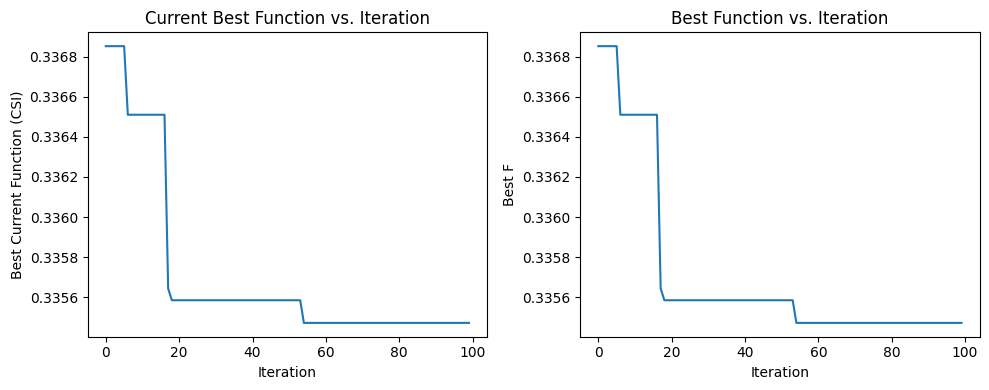

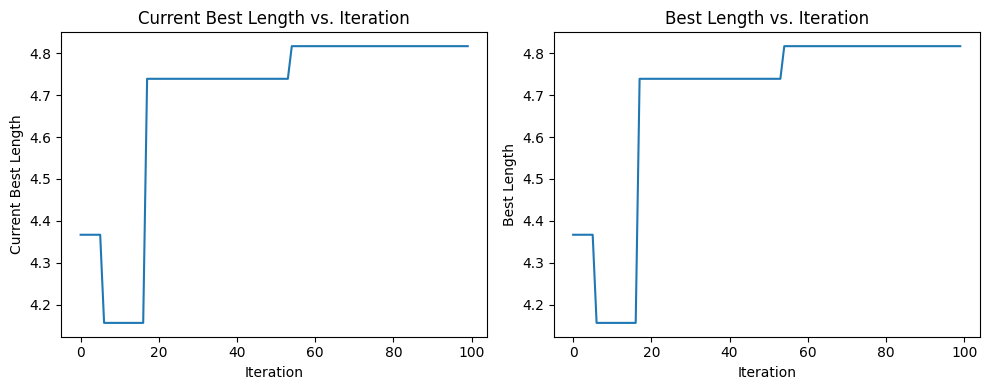

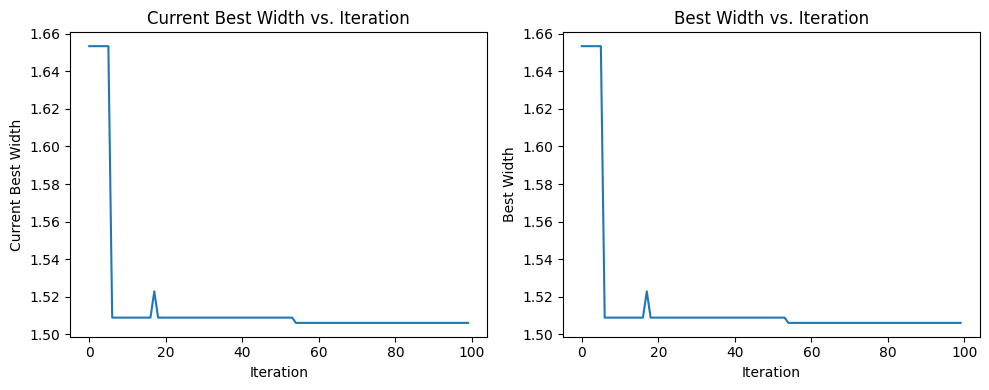

In [60]:
import random

#arrays to store the values
f2_best_values = []
f2_curr_values = []
l2_best_values = []
l2_curr_values = []
w2_best_values = []
w2_curr_values = []

#GA Function 1 for PCSI
def GA2():

    i_max = 100
    i = 0
    m = 5
    f_curr = []

    #Initilization of feasible solution
    #the boundiries of the lenght are (3.8, 4.9) and for the width are (1.5, 2)
    Gen_old = [
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)],
        [random.uniform(3.8, 4.9), random.uniform(1.5, 2)]
    ]

    #Sorting the Solution based of the value of CSI function
    sorted_gen_curr = sorted(Gen_old, key=lambda x: calculate_CSI(x[0], x[1]))

    #getting the best desicion varibles and function
    f_best = calculate_CSI(sorted_gen_curr[0][0], sorted_gen_curr[0][1])
    x_best = sorted_gen_curr[0]



    while (i < i_max):

      # Elitisim
      Gen_new = [sorted_gen_curr[0], [0,0], [0,0], [0,0], [0,0]]

      #Random resiting Mutation
      r = round(random.random()) #random number

      Mutated_arr = [0,0]
      if (r == 0):
        Mutated_arr = [random.uniform(3.8, 4.9), sorted_gen_curr[4][1]]
      else :
        Mutated_arr = [sorted_gen_curr[4][0], random.uniform(1.5, 2)]

      Gen_new[1] = Mutated_arr

      #Uniform Cross Over
      #parent selection according to rank
      #Cross Over between best elite and 2nd best elite

      r1 = round(random.random())  #random number 1
      r2 = round(random.random())  #random number 2

      child1 = [0,0]
      child2 = [0,0]

      if (r1 == 1):
        child1[0] = sorted_gen_curr[1][0]
        child2[0] = sorted_gen_curr[0][0]
      else:
        child1[0] = sorted_gen_curr[0][0]
        child2[0] = sorted_gen_curr[1][0]

      if (r2 == 1):
         child1[1] = sorted_gen_curr[1][1]
         child2[1] = sorted_gen_curr[0][1]
      else:
         child1[1] = sorted_gen_curr[0][1]
         child2[1] = sorted_gen_curr[1][1]


      r3 = round(random.random())
      r4 = round(random.random())

      child3 = [0,0]

      if (r3 == 1):
        child3[0] = sorted_gen_curr[2][0]
      else:
        child3[0] = sorted_gen_curr[0][0]

      if (r4 == 1):
         child3[1] = sorted_gen_curr[2][1]
      else:
         child3[1] = sorted_gen_curr[0][1]


      Gen_new[2] = child1
      Gen_new[3] = child2
      Gen_new[4] = child3

      sorted_gen_curr = sorted(Gen_new, key=lambda x: calculate_CSI(x[0], x[1]))

      f_curr = calculate_CSI(sorted_gen_curr[0][0], sorted_gen_curr[0][1])
      x_best_curr = sorted_gen_curr[0]


      if (f_curr < f_best):
        f_best = f_curr
        x_best = x_best_curr

      i += 1

      #for the plotting
      f2_best_values.append(f_best)
      l2_best_values.append(x_best[0])
      w2_best_values.append(x_best[1])
      f2_curr_values.append(f_curr)
      l2_curr_values.append(x_best_curr[0])
      w2_curr_values.append(x_best_curr[1])



    return f_best, x_best




GA2_Result = GA2()
#print(SA_Result)
print(f"The best F is {GA2_Result[0]}")
print(f"The best L is {GA2_Result[1][0]}")
print(f"The best W is {GA2_Result[1][1]}")

#Plotting the graphs

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(f2_curr_values)
plt.xlabel("Iteration")
plt.ylabel("Best Current Function (CSI)")
plt.title("Current Best Function vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(f2_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best F")
plt.title("Best Function vs. Iteration")

plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(l2_curr_values)
plt.xlabel("Iteration")
plt.ylabel("Current Best Length")
plt.title("Current Best Length vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(l2_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Length")
plt.title("Best Length vs. Iteration")

plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(w2_curr_values)
plt.xlabel("Iteration")
plt.ylabel("Current Best Width")
plt.title("Current Best Width vs. Iteration")

plt.subplot(1, 2, 2)
plt.plot(w2_best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Width")
plt.title("Best Width vs. Iteration")

plt.tight_layout()
plt.show()
